# Identitas Kelompok
Nomor Kelompok: 5

Nama Kelompok: Lima-B-Aja

Ketua Kelompok: Fajar Arahman

Anggota kelompok:
1. MUHAMAD FAHMI AMIQ
2. FAJAR ARAHMAN
3. AMMAR KHAQ BAASIR
4. LIANUS
5. INDAH LESTARI
6. NADILA
7. FATIHAH
8. Meilia Choirun Nisa 

Pilihan Dataset: E-commerce Churn Rate

# Import Library & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)

1.3.5
1.22.4
3.2.2
0.11.2


In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# STAGE 1 EDA, VISUALIZATION

In [3]:
df = pd.read_excel('dataset/e_commerce.xlsx', sheet_name=1)
df.head() 

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

# 1. Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.PreferredLoginDevice.unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [6]:
df.PreferredPaymentMode.unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [7]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df.PreferedOrderCat.unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [9]:
df.MaritalStatus.unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [10]:
df.duplicated().sum()

0

**Analisa**
* Jumlah data ada 5630 baris dan 20 kolom
* Tidak ada duplikat pada dataset
* Pada bagian PreferredPaymentethod terdapat kesamaan yaitu variabel 'Cash on Delivery' dengan 'COD' selain itu 'Credit Card' dengan 'CC'
* Pada kolom PreferedOrderCat terdapat kesamaan yaitu variabel 'Mobile' dan 'Mobile Phone'

* Pada kolom PreferredLoginDevice terdapat kesamaan yaitu variable 'Mobile Phone' dan 'Phone'

* A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

Pada bagian PreferredPaymentethod terdapat kesamaan yaitu variabel 'Cash on Delivery' dengan 'COD' selain itu 'Credit Card' dengan 'CC'

Pada kolom PreferedOrderCat terdapat kesamaan yaitu variabel 'Mobile' dan 'Mobile Phone'

Pada kolom PreferredLoginDevice terdapat kesamaan yaitu variable 'Mobile Phone' dan 'Phone'

* B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [11]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('Jumlah data yang null:', df[i].isnull().sum())
        print('Tipe Data yaitu', df[i].dtypes)
        print()

Tenure
Jumlah data yang null: 264
Tipe Data yaitu float64

WarehouseToHome
Jumlah data yang null: 251
Tipe Data yaitu float64

HourSpendOnApp
Jumlah data yang null: 255
Tipe Data yaitu float64

OrderAmountHikeFromlastYear
Jumlah data yang null: 265
Tipe Data yaitu float64

CouponUsed
Jumlah data yang null: 256
Tipe Data yaitu float64

OrderCount
Jumlah data yang null: 258
Tipe Data yaitu float64

DaySinceLastOrder
Jumlah data yang null: 307
Tipe Data yaitu float64



* C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 


In [12]:
df.describe().transpose()

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Churn                            0.00      0.00      0.0000      1.00  
Tenure                           2.00      9.00     16.0000     61.00  
CityTier                         1.00      1.00      3.0000      3.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00  
SatisfactionScore                2.00      3.00      4.0000      5.00  
NumberOfAddress                  2.00      3.00      6.0000     22.00  
Complain                         0.00      0.00      1.0000      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

Tidak ada keanehan

### Pembagian Kategori

In [13]:
cats =['PreferredLoginDevice', 
                 'PreferredPaymentMode',
                 'Gender',
                 'PreferedOrderCat',
                 'MaritalStatus']

nums = ['CustomerID', 
              'Tenure', 
              'CityTier', 
              'WarehouseToHome', 
              'HourSpendOnApp', 
              'NumberOfDeviceRegistered', 
              'SatisfactionScore', 
              'NumberOfAddress', 
              'Complain', 
              'OrderAmountHikeFromlastYear',
              'CouponUsed', 
              'OrderCount', 
              'DaySinceLastOrder', 
              'CashbackAmount', 
              'Churn']

In [14]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('\n')

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64


Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




In [15]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

## Persentase missing value

In [16]:
# jumlah data null
grouped_data = []
for col in df.columns:
    n_missing = df[col].isnull().sum()
    percentage = n_missing / df.shape[0] * 100
    grouped_data.append([col, n_missing, percentage])

grouped_df = pd.DataFrame(grouped_data, columns=['column', 'n_missing', 'percentage'])

result = grouped_df.groupby(['column', 'n_missing', 'percentage']).size()
result

column                       n_missing  percentage
CashbackAmount               0          0.000000      1
Churn                        0          0.000000      1
CityTier                     0          0.000000      1
Complain                     0          0.000000      1
CouponUsed                   256        4.547069      1
CustomerID                   0          0.000000      1
DaySinceLastOrder            307        5.452931      1
Gender                       0          0.000000      1
HourSpendOnApp               255        4.529307      1
MaritalStatus                0          0.000000      1
NumberOfAddress              0          0.000000      1
NumberOfDeviceRegistered     0          0.000000      1
OrderAmountHikeFromlastYear  265        4.706927      1
OrderCount                   258        4.582593      1
PreferedOrderCat             0          0.000000      1
PreferredLoginDevice         0          0.000000      1
PreferredPaymentMode         0          0.000000     

* CouponUsed = 4.54%
* DaySinceLastOrder = 5.45%
* HourSpendOnApp = 4.52%
* OrderAmountHikeFromlastYear = 4.7%
* OrderCount = 4.58%
* Tenure = 4.68%
* WarehouseToHome = 4.45%

# 2. Univariate Analysis

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

### Box Plot

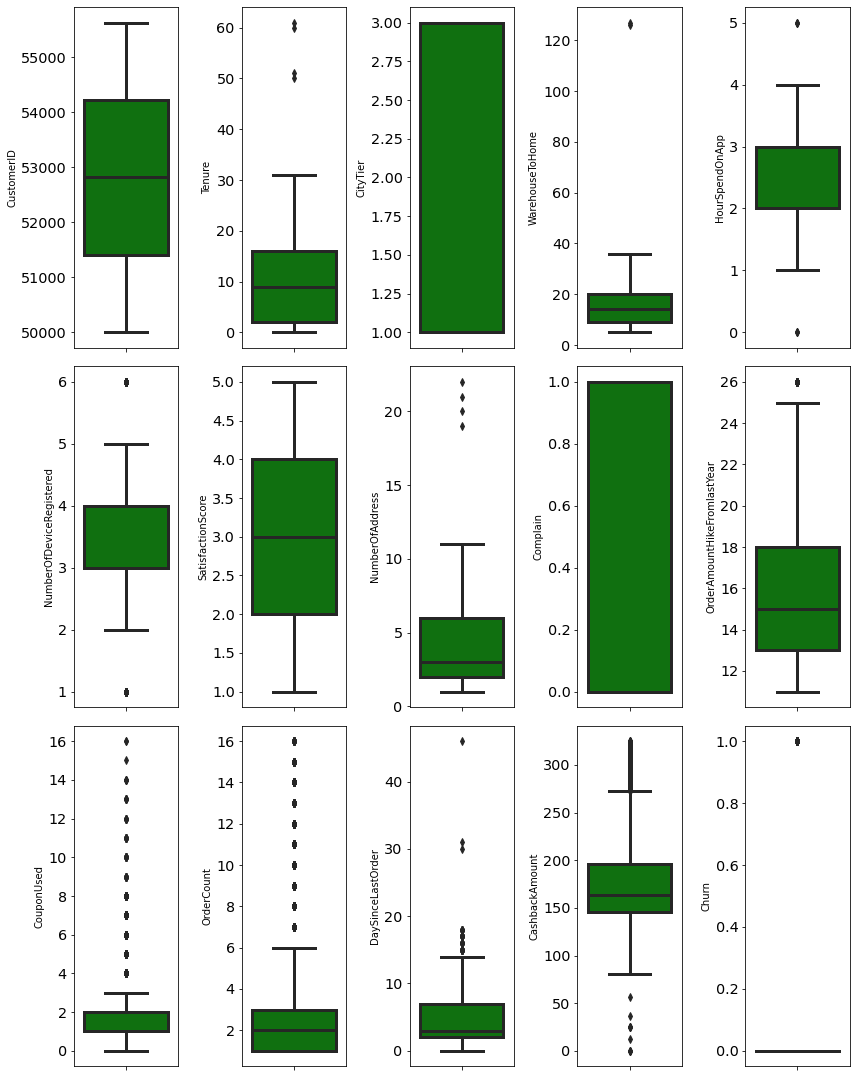

In [17]:
plt.figure(figsize=(12, 20))
for i in range(0, len(nums)):
    plt.subplot(4, int(len(nums)/3), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

**Hasil Observasi Boxplot:**
> Semua data numerik memiliki outlier


### Distribution Graph

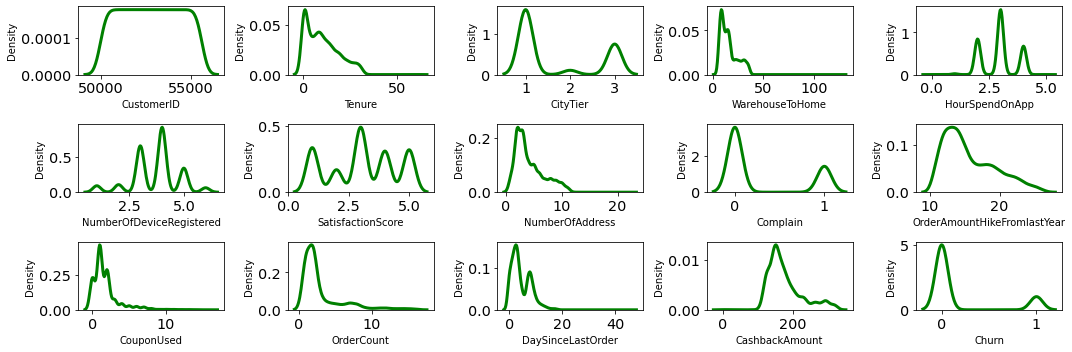

In [18]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[nums[i]], color='green')
    plt.xlabel(nums[i])
    plt.tight_layout()

**Hasil Observasi:**

| Fitur                     | Jenis Distribusi             | Deskripsi                                                      | Tindak Lanjut                                                   |
|---------------------------|------------------------------|-----------------------------------------------------------------|-------------------------------------------------------------------|
| CustomerID                | Uniform                      | Setiap ID bersifat unik dan muncul kira-kira satu kali.          | Pertimbangkan untuk menurunkan fitur ini karena mungkin tidak berguna untuk model prediksi.                                |
| Tenure                    | Bimodal                      | Ada dua kelompok pelanggan berdasarkan masa kerja mereka.         | Selidiki alasan bimodality dan pertimbangkan segmentasi pelanggan berdasarkan masa kerja untuk strategi yang lebih tertarget.     |
| CityTier                  | Multimodal (tiga puncak)      | Mayoritas pelanggan berada pada tingkat 1 dan 2, dengan lebih sedikit pelanggan pada tingkat 3. | Pertimbangkan one-hot encoding untuk representasi yang akurat saat pemodelan.                                             |
| WarehouseToHome           | Right-skewed                 | Sebagian besar pelanggan tinggal lebih dekat dengan gudang.       | Terapkan transformasi seperti log atau akar kuadrat untuk mengurangi kemiringan.                                              |
| HourSpendOnApp            | Bimodal                      | Menunjukkan dua kelompok utama perilaku pengguna terkait durasi penggunaan aplikasi. | Selidiki alasan bimodality dan pertimbangkan segmentasi pengguna berdasarkan waktu penggunaan aplikasi.                    |
| NumberOfDeviceRegistered  | Right-skewed                 | Mayoritas pelanggan mendaftarkan 2-3 perangkat.                    | Terapkan transformasi seperti log atau akar kuadrat untuk mengurangi kemiringan.                                              |
| SatisfactionScore         | Multimodal (tiga puncak)      | Beragam tingkat kepuasan pelanggan.                               | Mensegmentasikan pelanggan berdasarkan skor ini dapat memberikan wawasan yang berguna.                                        |
| NumberOfAddress           | Right-skewed                 | Mayoritas pelanggan mendaftarkan 1-2 alamat.                       | Terapkan transformasi seperti log atau akar kuadrat untuk mengurangi kemiringan.                                              |
| Complain                  | Mayoritas nilai 0            | Mayoritas pelanggan belum mengajukan keluhan.                      | Periksa ketidakseimbangan kelas jika digunakan sebagai fitur. Mungkin diperlukan oversampling atau undersampling.            |
| OrderAmountHikeFromlastYear | Bimodal                     | Dua kelompok berbeda di sekitar nilai 10 dan 20.                   | Telusuri alasan bimodality dan pertimbangkan segmentasi berdasarkan kenaikan jumlah pesanan.                                 |
| CouponUsed                | Right-skewed                 | Mayoritas pelanggan menggunakan sejumlah kecil kupon.               | Pertimbangkan normalisasi menggunakan transformasi log atau akar kuadrat untuk mengatasi kemiringan.                        |
| OrderCount                | Right-skewed                 | Mayoritas pelanggan memiliki jumlah pesanan yang lebih rendah.      | Pertimbangkan normalisasi menggunakan transformasi untuk mengatasi kemiringan.                                              |
| DaySinceLastOrder         | Puncak di sekitar 20 hari    | Mayoritas pelanggan memiliki jeda sekitar 20 hari sejak pesanan terakhir mereka. | Telusuri alasan puncak ini untuk mendapatkan wawasan tentang perilaku pelanggan.                                        |
| CashbackAmount            | Right-skewed                 | Mayoritas pelanggan menerima jumlah cashback yang lebih kecil.     | Pertimbangkan normalisasi menggunakan transformasi untuk mengatasi kemiringan.                                              |
| Churn                     | Distribusi Biner             | Lebih sedikit pelanggan yang churn dibandingkan yang tidak.        | Pastikan tidak ada ketidakseimbangan kelas. Gunakan oversampling, undersampling, atau metrik evaluasi yang sesuai.             |


### Histogram categorical data

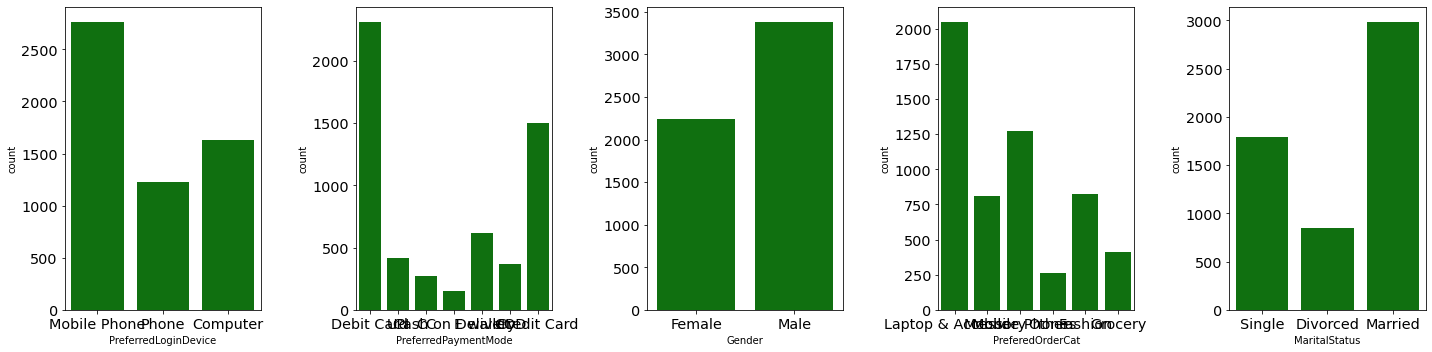

In [19]:
plt.figure(figsize=(20,5))
for i in range(0, len(cats)):
    plt.subplot(1, len(cats), i+1)
    sns.countplot(x=df[cats[i]], color ='green')
    plt.tight_layout()

**Hasil Observasi:** 
> * PrefferedLoginDevice mayoritas adalah Mobile Phone
> * PrefferedPaymentMode mayoritas adalah Debit Card
> * Gender mayoritas adalah Male
> * PrefferedOrderCat mayoritas adalah Laptop & Accessory
> * MaritalStatus mayoritas adalah Married

# 3. Multivariate Analysis

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:
* A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
* B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

In [20]:
df[nums].corr()

CustomerID    Tenure  CityTier  WarehouseToHome  \
CustomerID                     1.000000  0.029952  0.003239         0.058909   
Tenure                         0.029952  1.000000 -0.060688        -0.018218   
CityTier                       0.003239 -0.060688  1.000000         0.010624   
WarehouseToHome                0.058909 -0.018218  0.010624         1.000000   
HourSpendOnApp                 0.598417 -0.021226 -0.009150         0.060990   
NumberOfDeviceRegistered       0.411098 -0.023983  0.027934         0.019071   
SatisfactionScore             -0.033146 -0.013903 -0.011554         0.007722   
NumberOfAddress                0.160814  0.237666 -0.029440        -0.011020   
Complain                      -0.009944 -0.021268  0.003375         0.028696   
OrderAmountHikeFromlastYear    0.117243  0.005825 -0.031408         0.038795   
CouponUsed                     0.234302  0.129035  0.021456        -0.003935   
OrderCount                     0.139008  0.186403  0.033388         0.002681   
DaySinceLastOrder              0.113243  0.184552  0.017525         0.017829   
CashbackAmount                 0.217129  0.476380  0.055746        -0.009200   
Churn                         -0.019083 -0.349408  0.084703         0.076630   

                             HourSpendOnApp  NumberOfDeviceRegistered  \
CustomerID                         0.598417                  0.411098   
Tenure                            -0.021226                 -0.023983   
CityTier                          -0.009150                  0.027934   
WarehouseToHome                    0.060990                  0.019071   
HourSpendOnApp                     1.000000                  0.316800   
NumberOfDeviceRegistered           0.316800                  1.000000   
SatisfactionScore                  0.031858                 -0.017228   
NumberOfAddress                    0.145126                  0.084997   
Complain                           0.006976                  0.003407   
OrderAmountHikeFromlastYear        0.106843                  0.069475   
CouponUsed                         0.191528                  0.151685   
OrderCount                         0.109575                  0.103464   
DaySinceLastOrder                  0.075716                  0.018208   
CashbackAmount                     0.121490                  0.137183   
Churn                              0.018675                  0.107939   

                             SatisfactionScore  NumberOfAddress  Complain  \
CustomerID                           -0.033146         0.160814 -0.009944   
Tenure                               -0.013903         0.237666 -0.021268   
CityTier                             -0.011554        -0.029440  0.003375   
WarehouseToHome                       0.007722        -0.011020  0.028696   
HourSpendOnApp                        0.031858         0.145126  0.006976   
NumberOfDeviceRegistered             -0.017228         0.084997  0.003407   
SatisfactionScore                     1.000000         0.053583 -0.031115   
NumberOfAddress                       0.053583         1.000000 -0.026399   
Complain                             -0.031115        -0.026399  1.000000   
OrderAmountHikeFromlastYear          -0.027730         0.015533 -0.004529   
CouponUsed                            0.017936         0.042120 -0.008174   
OrderCount                            0.019764        -0.007609 -0.019307   
DaySinceLastOrder                     0.032082        -0.064847 -0.043546   
CashbackAmount                        0.003473         0.186688  0.000525   
Churn                                 0.105481         0.043931  0.250188   

                             OrderAmountHikeFromlastYear  CouponUsed  \
CustomerID                                      0.117243    0.234302   
Tenure                                          0.005825    0.129035   
CityTier                                       -0.031408    0.021456   
WarehouseToHome                                 0.038795  

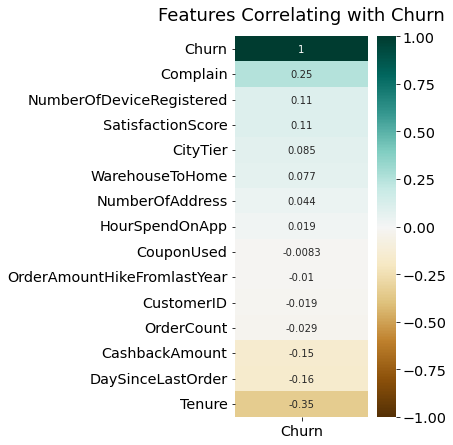

In [21]:
plt.figure(figsize=(3, 7))
heatmap = sns.heatmap(df[nums].corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Churn', fontdict={'fontsize':18}, pad=16);

Analisa : 
- 'Tenure' memiliki korelasi negative sedang sebesar -0.35 dengan churn, ini menunjukkan bahwa tenure memiliki korelasi berkebalikan dengan churn. 
- Feature - Feature lain memiliki nilai korelasi yang sangat rendah yakni mendekati nilai 0. hal ini menunjukkan bahwa beberapa Feature yang mendekati nilai 0 tersebut, tidak memiliki korelasi dengan churn. 

Action : 
- Terdapat beberapa Feature penting yang memiliki korelasi nilai sedang (menjauhi nilai 0), beberapa Feature ini dapat dipertahankan untuk dapat dijadikan Feature utama (feature penting) dalam proses training model machine learning. Feature - Feature tersebut seperti Complain, dan Tenure. 
- Feature - Feature yang memiliki korelasi low (mendekati nilai 0) harus dipertimbangkan untuk dibuang atau dipertahankan, karena beberapa Feature tersebut bisa jadi memiliki informasi penting yang unik yang berguna untuk bahan pembelajaran model machine learning yang digunakan.  

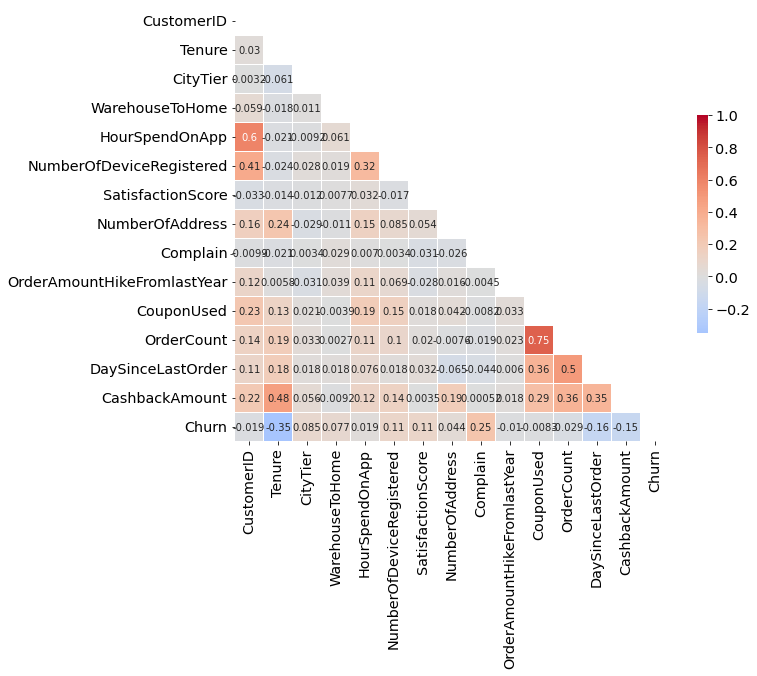

In [22]:
# Compute the correlation matrix
corr = df[nums].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


Analisa : 
- Terdapat dua Feature yang memiliki korelasi positif cukup tinggi yakni Feature CouponUsed dengan Feature OrderCount yang memiliki nilai sebesar 0.75
- Terdapat juga dua Feature yang saling berkolerasi positif sedang dengan nilai 0.5 yakni Feature OrderCount dengan Feature DaySinceLastOrder. selian itu Feature Tenure dengan CashbackAmount juga memiliki korelasi positif sedang dengan nilai 0.48
- Terdapat banyak Feature yang memiliki nilai korelasi low (nilainya mendekati 0) dalam hal ini secara umum dapat dikatakan bagus karena mungkin beberapa Feature tersebut dapat memberikan informasi - informasi yang unik untuk model machine learning yang akan digunakan. 

Action : 
- Mempertahankan beberapa fitur yang memiliki nilai korelasi yang tinggi seperti CouponUsed dengan OrderCount
- Mempertimbangkan membuang fitur CustomerID, walaupun CustomerID memiliki nilai korelasi yang tinggi dengan HourSpendOnApp yakni sebesar 0.6 fitur ini masih akan dipertimbangkan untuk dibuang karena diyakini tidak memiliki hubungan antara keduanya. 
- Mempertimbangkan beberapa fitur seperti CouponUsed dengan OrderCount yang memiliki korelasi cukup tinggi, dipertimbangkan untuk menggabungkan kedua Feature tersebut menjadi satu fitur atau membuang salah satu Feature. 

# 4. Business Insight

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu
business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan
rekomendasinya untuk bisnis.

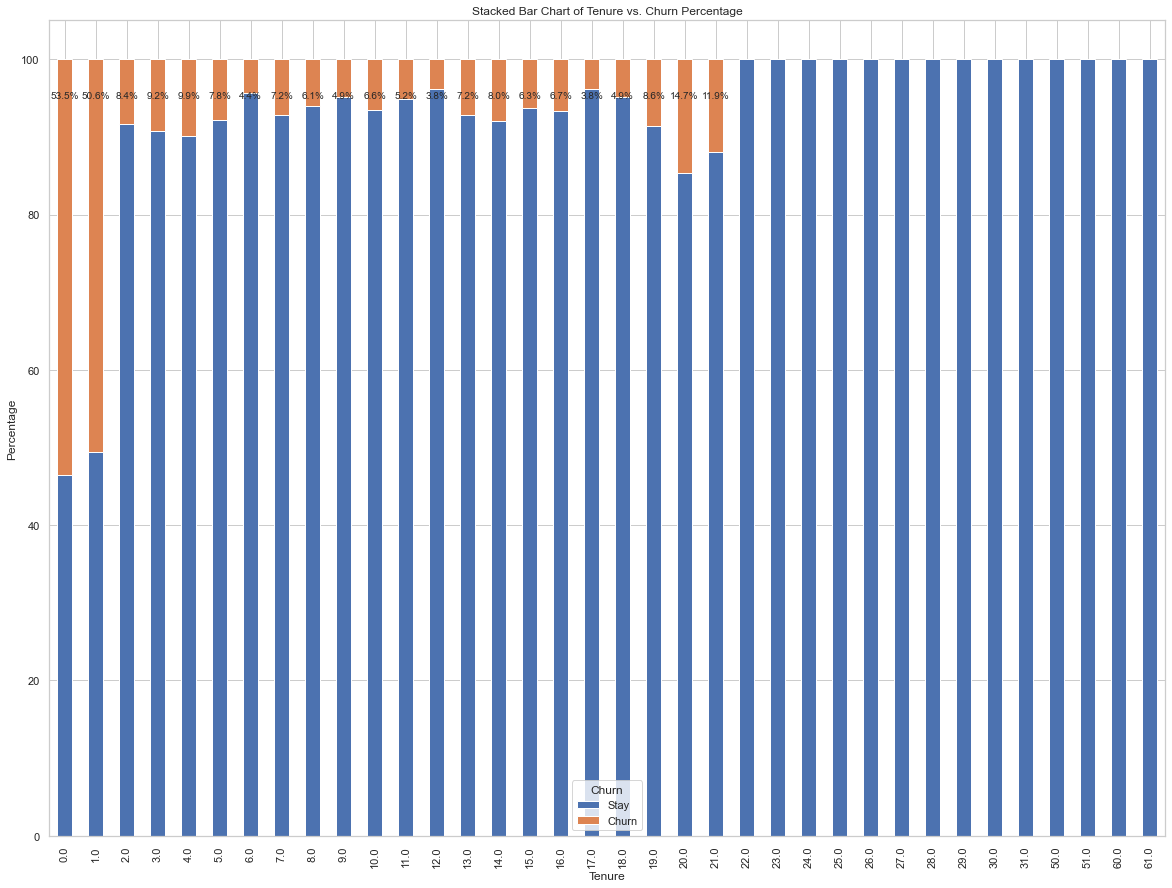

In [23]:
# Hitung persentase Churn dan Stay di setiap Tenure
tenure_churn_counts = df.groupby(['Tenure', 'Churn']).size().unstack()
tenure_churn_percentage = (tenure_churn_counts.div(tenure_churn_counts.sum(axis=1), axis=0) * 100)

# Gunakan Seaborn untuk membuat grafik batang bertumpuk dengan persentase
sns.set(style="whitegrid")
ax = tenure_churn_percentage.plot(kind='bar', stacked=True, figsize=(20, 15))

plt.xlabel('Tenure')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Tenure vs. Churn Percentage')

# Tambahkan label pada legenda
plt.legend(title='Churn', labels=['Stay', 'Churn'])

# Tambahkan label angka pada setiap bar Churn dengan jarak antara bar
for p in ax.patches[len(tenure_churn_counts):]:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height - 5), ha='center', fontsize=10)

# Tampilkan grafik
plt.show()

### Observation & Insight:
Customer dengan Tenure rendah (kurang dari 2 bulan) memiliki potensi churn jauh lebih tinggi daripada tenure menengah keatas. Terlihat dalam grafik tenure 0-1 bulan memiliki persentase churn yang paling tinggi sebesar 53,5%.Tenure 1-2 bulan memiliki persentase churn yang tinggi juga sebesar 50,6%. Sedangkan Tenure yang lebih dari 2 bulan memiliki sampai 21 bulan memiliki median sekitar 13,9%. Dari grafik juga terlihat customer yang memiliki tenure lebih dari sama dengan 22 bulan tidak ada customer yang Churn

Berikut beberapa rekomendasi bisnis yang dapat membantu Anda memfokuskan upaya untuk menjaga pelanggan yang baru bergabung:

1. Program Onboarding yang Efektif: Buatlah program onboarding yang efektif untuk pelanggan yang baru bergabung, dengan panduan langkah demi langkah yang memudahkan mereka dalam menggunakan aplikasi dan berbelanja. Sediakan bantuan dan dukungan pelanggan yang mudah diakses selama periode onboarding.

2. Penawaran Spesial untuk Tenure Rendah: Berikan penawaran spesial, diskon, atau hadiah kepada pelanggan dengan tenure rendah untuk mendorong mereka berbelanja lebih banyak. Buatlah paket promosi khusus untuk produk-produk yang biasanya dibeli oleh pelanggan baru.

3. Customer Engagement: Fokus pada customer engagement dengan mengirimkan email, notifikasi, atau pesan langsung yang memberikan informasi tentang produk, penawaran khusus, atau rekomendasi berdasarkan perilaku mereka.

4. Program Loyalty: Implementasikan program loyalty yang memberikan insentif kepada pelanggan yang tetap berbelanja dengan Anda. Berikan poin atau diskon tambahan setelah pelanggan mencapai tenure tertentu. Berikan insentif kepada pelanggan yang mereferensikan teman atau keluarga untuk bergabung dengan aplikasi Anda.

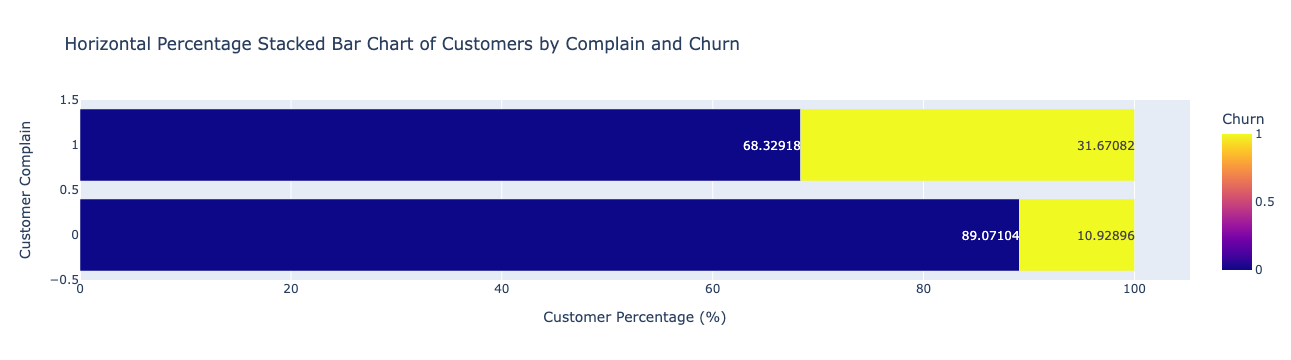

In [24]:
df2 = df.copy()
df2['Complain'].map({0: 'No', 1: 'Yes'})

# Group the data by 'Complain', 'Churn', and count the number of occurrences
grouped_data = df2.groupby(['Complain', 'Churn']).size().reset_index(name='Count')

# Calculate the percentage of customers in each stack
grouped_data['Percentage'] = grouped_data['Count'] / grouped_data.groupby('Complain')['Count'].transform('sum') * 100

# Plot the horizontal percentage stacked bar chart
fig = px.bar(grouped_data, x='Percentage', y='Complain', orientation='h', color='Churn',
             title='Horizontal Percentage Stacked Bar Chart of Customers by Complain and Churn',
             color_discrete_sequence=['#3A506B', '#BA1F33'],
             labels={'Complain': 'Customer Complain', 'Percentage': 'Customer Percentage'})

# Customize the plot
fig.update_layout(barmode='stack')
fig.update_traces(texttemplate='%{value}', textposition='inside')
fig.update_xaxes(title_text='Customer Percentage (%)')
fig.update_yaxes(title_text='Customer Complain')

fig.show()

### Observation & Insight:
Persentase churn akibat customer complain (31.67%) hampir 3 kali lebih besar dari
persentase churn dari total customer yang tidak complain (10.92%)


upaya bisnis Anda pada mengurangi jumlah pelanggan yang mengajukan komplain dengan strategi berikut:
1. Analisis dan Perbaikan Pengalaman Pelanggan: Lakukan survei pelanggan dan analisis lebih lanjut untuk memahami penyebab komplain pelanggan. Identifikasi masalah umum dan tindakan korektif yang diperlukan. Tingkatkan pengalaman pelanggan dengan memastikan website atau aplikasi mudah digunakan, proses pembayaran yang lancar, dan pelayanan pelanggan yang responsif.

2. Pemantauan dan Umpan Balik: Pantau secara rutin umpan balik pelanggan dan komplain yang masuk. Gunakan data ini untuk terus meningkatkan produk dan layanan Anda. Tanggapi komplain dengan cepat dan efisien, dan berikan resolusi yang memuaskan kepada pelanggan.

3. Transparansi dan Komunikasi: Jalin komunikasi terbuka dengan pelanggan. Berikan informasi yang jelas tentang produk, harga, dan kebijakan pengembalian barang. Berikan pembaruan kepada pelanggan jika terjadi keterlambatan pengiriman atau perubahan kebijakan penting lainnya.

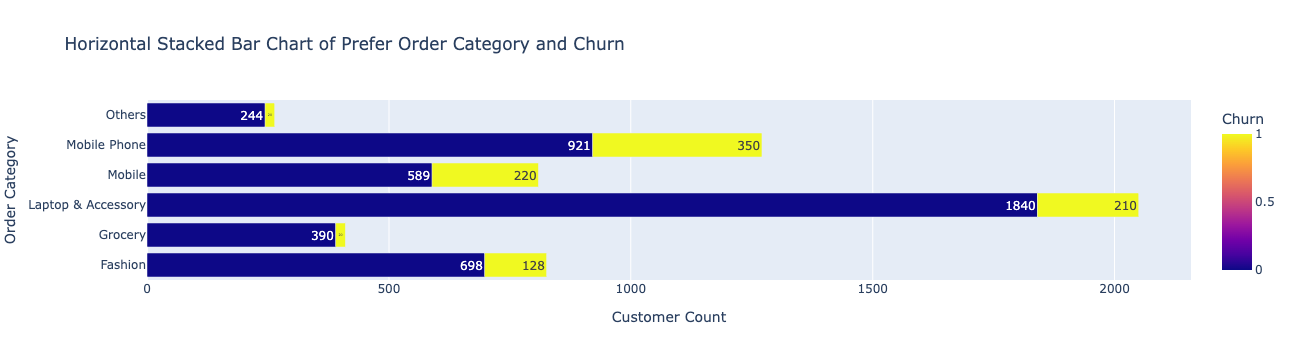

In [25]:
grouped_data = df.groupby(['PreferedOrderCat', 'Churn']).size().reset_index(name='Count')

# Plot the histogram
fig = px.bar(grouped_data, x='Count', y='PreferedOrderCat', orientation='h', color='Churn',
             title='Horizontal Stacked Bar Chart of Prefer Order Category and Churn',
             color_discrete_sequence=['#3A506B', '#BA1F33'],
             labels={'PreferedOrderCat': 'Order Category', 'Count': 'Customer Count'})

# Customize the plot
fig.update_layout(barmode='stack')
fig.update_traces(texttemplate='%{value}', textposition='inside')
fig.update_xaxes(title_text='Customer Count')
fig.update_yaxes(title_text='Order Category')

fig.show()

## Observation & Insight:
Customer yang mengorder kategori Mobile Phone dan Phone cenderung untuk churn,
dengan persentase sebesar 27.53% untuk Mobile Phone dan 27.19% untuk Phone. Jika
dibandingkan dengan customer yang mengorder kategori barang lainnya

Ada beberapa strategi yang dapat membantu Anda mengurangi churn pelanggan di masa yang akan datang:
1. Optimalkan Pengalaman Pelanggan untuk Kategori "Mobile Phone", "Mobile", dan "Laptop & Accessory": Identifikasi masalah yang umum terjadi dalam kategori ini, seperti pengiriman yang lambat, kualitas produk yang rendah, atau pelayanan pelanggan yang kurang baik. Tingkatkan pengalaman pelanggan dengan memastikan produk dalam kategori ini berkualitas tinggi, pelayanan pelanggan yang responsif, dan proses pengiriman yang cepat.

2. Tawarkan Promosi Khusus untuk Kategori "Grocery" dan "Others": Meskipun kategori "Grocery" dan "Others" memiliki tingkat churn yang rendah, Anda dapat mempertimbangkan untuk menawarkan promosi khusus, diskon, atau insentif kepada pelanggan yang membeli produk dalam kategori ini. Ini dapat meningkatkan loyalitas pelanggan.

# STAGE 2 DATA PRE-PROCESSING

In [26]:
df.head(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [27]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

Direname jadi satu variabel dikarenakan sama phone dengan mobile phone untuk kategori logindevice dan ordercat

In [28]:
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

Dikarenakan makna cod dengan cc adalah Cash on Delivery dan Credit Card, jadi direname variabelnya

In [29]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

# 1. Data Cleansing

### A. Handling Missing Values

In [30]:
# melihat presentase missing value pada data 
missing_value = pd.DataFrame(df.isna().sum(), columns = ['Missing Values'])
missing_value['% Missing Values'] = df.isna().sum() / len(df)*100
missing_value = missing_value[missing_value['% Missing Values'] > 0]
missing_value

Missing Values  % Missing Values
Tenure                                  264          4.689165
WarehouseToHome                         251          4.458259
HourSpendOnApp                          255          4.529307
OrderAmountHikeFromlastYear             265          4.706927
CouponUsed                              256          4.547069
OrderCount                              258          4.582593
DaySinceLastOrder                       307          5.452931

In [31]:
x = sum(missing_value['% Missing Values'])
print((f'Total persentase missing value: {x:.2f}%'))

Total persentase missing value: 32.97%


Karena presentase missing value setiap kategori besar dan jika di drop data menjadi kehilangan sekitar 32% rows. Maka missing value tidak bisa di drop. Langkah selanjutnya yang digunakan adalah imputasi

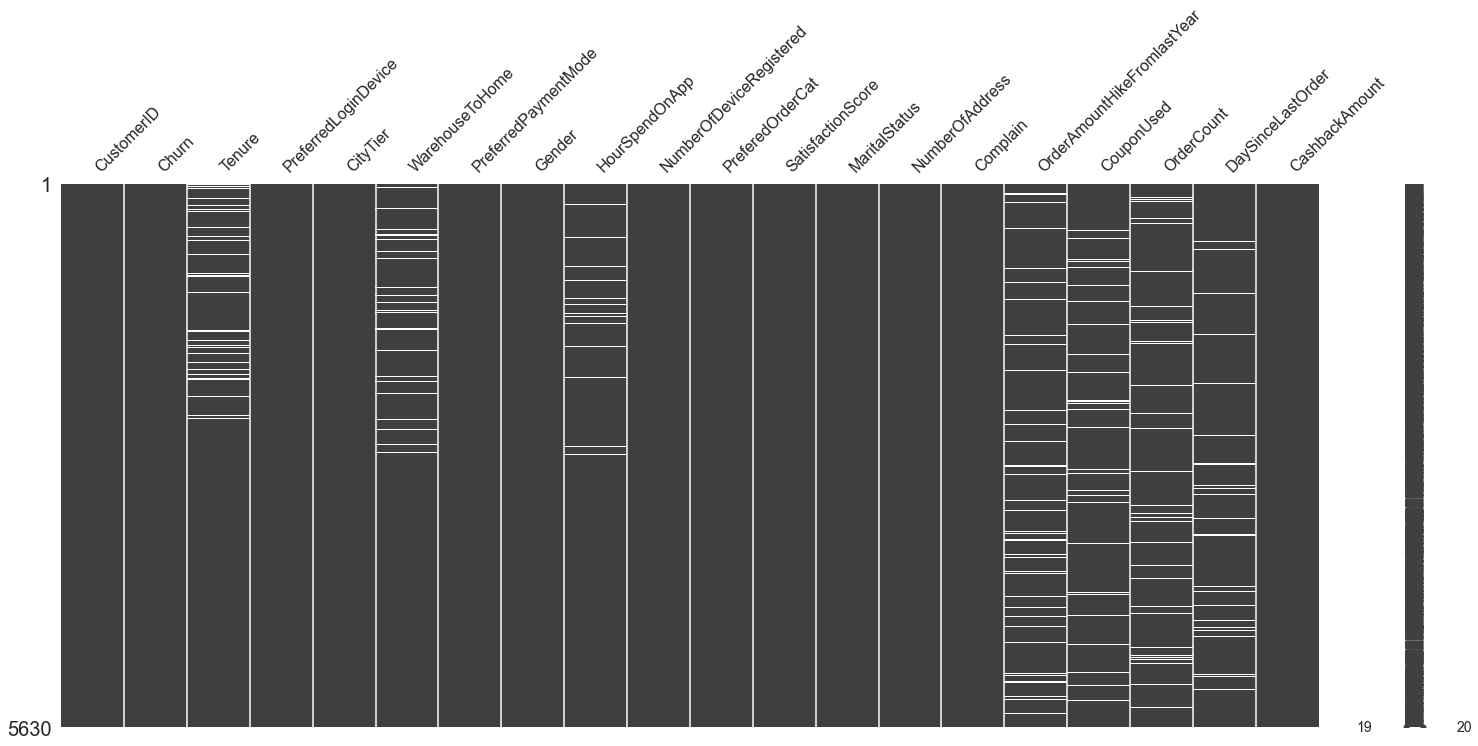

In [32]:
msno.matrix(df)

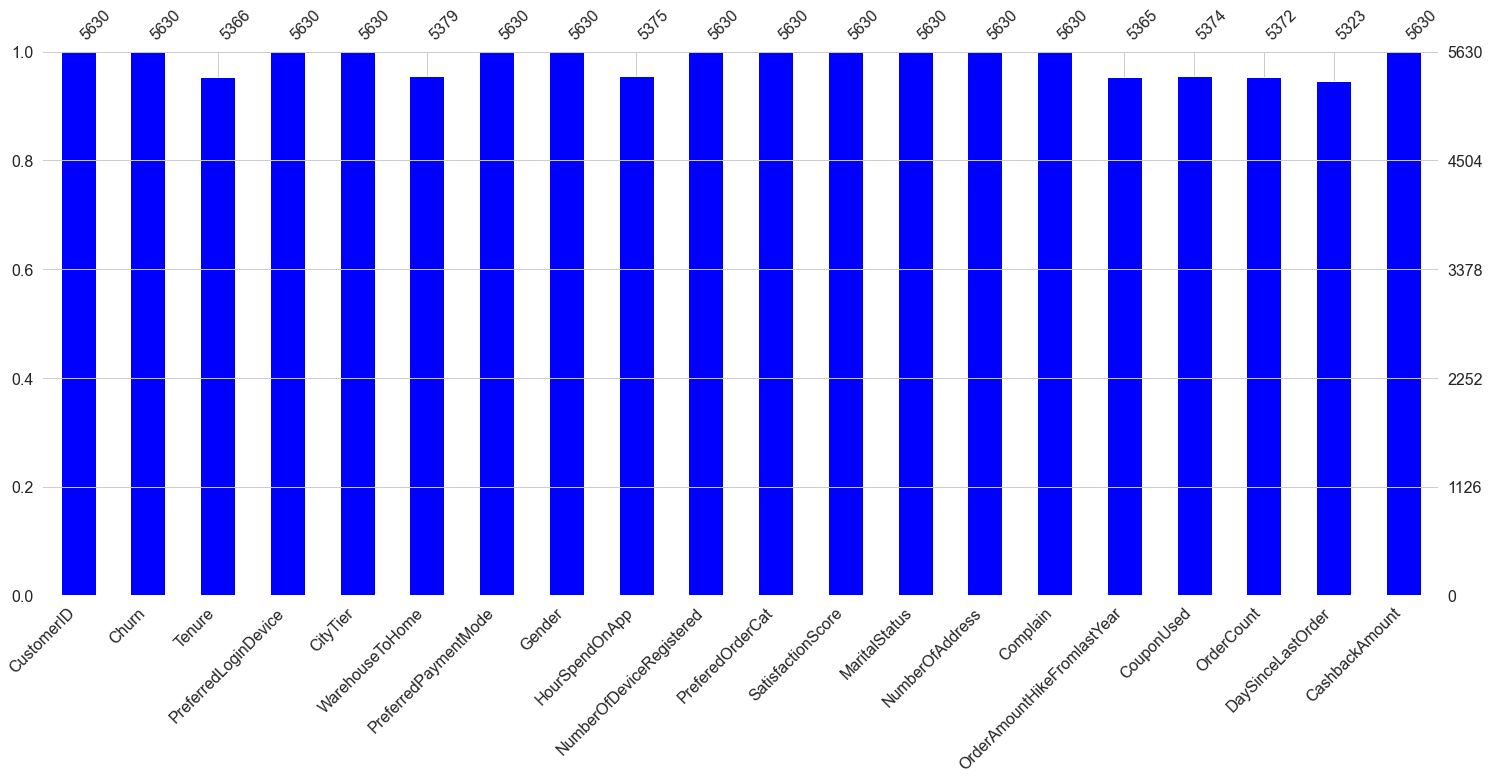

In [33]:
msno.bar(df, color='blue')

In [35]:
#memisahkan data tipe Kontinu(Interval)
kontinu_interval  = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Sebelum di impute

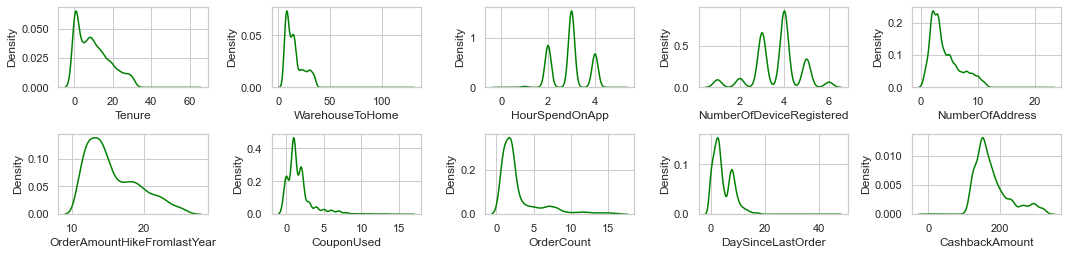

In [36]:
plt.figure(figsize=(15, 5))
for i in range(0, len(kontinu_interval)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[kontinu_interval[i]], color='green')
    plt.xlabel(kontinu_interval[i])
    plt.tight_layout()
plt.show()

In [37]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [38]:
# impute missing value
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mode()[0], inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

Berdasarkan pengamatan diatas. Berikut adalah strategi kita mengatasi missing values pada setiap kolom. 

* `Tenure` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `WarehouseToHome` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `HourSpendOnApp` \: impute dengan nilai modus (karena merupakan data dengan jenis kategorik numerik)
* `OrderAmountHikeFromlastYear` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `CouponUsed` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `OrderCount` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `DaySinceLastOrder` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)

In [39]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

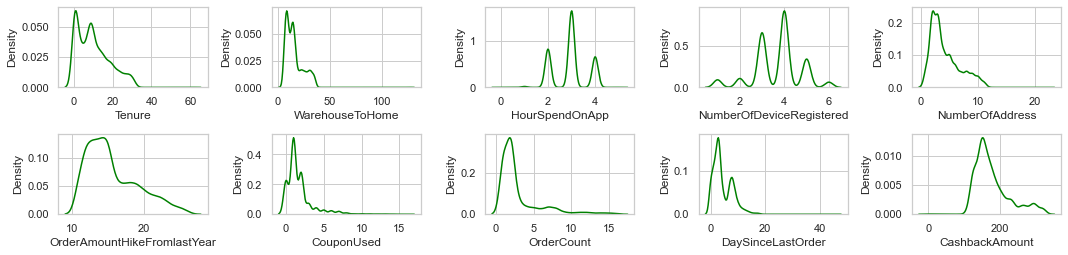

In [40]:
plt.figure(figsize=(15, 5))
for i in range(0, len(kontinu_interval)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[kontinu_interval[i]], color='green')
    plt.xlabel(kontinu_interval[i])
    plt.tight_layout()
plt.show()

In [41]:
# cek jumlah missing data setelah preprocessing
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [42]:
df.head(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     9.0         Mobile Phone         1              8.0   
2       50003      1     9.0         Mobile Phone         1             30.0   
3       50004      1     0.0         Mobile Phone         3             15.0   
4       50005      1     0.0         Mobile Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4          Credit Card    Male             3.0                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1        Mobile Phone                  3        Single                7   
2        Mobile Phone                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4        Mobile Phone                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

### B. Handle Duplicated Data

In [43]:
df.duplicated().sum()

0

### C. Handle outliers

In [44]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [45]:
df.head(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     9.0         Mobile Phone         1              8.0   
2       50003      1     9.0         Mobile Phone         1             30.0   
3       50004      1     0.0         Mobile Phone         3             15.0   
4       50005      1     0.0         Mobile Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4          Credit Card    Male             3.0                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1        Mobile Phone                  3        Single                7   
2        Mobile Phone                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4        Mobile Phone                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

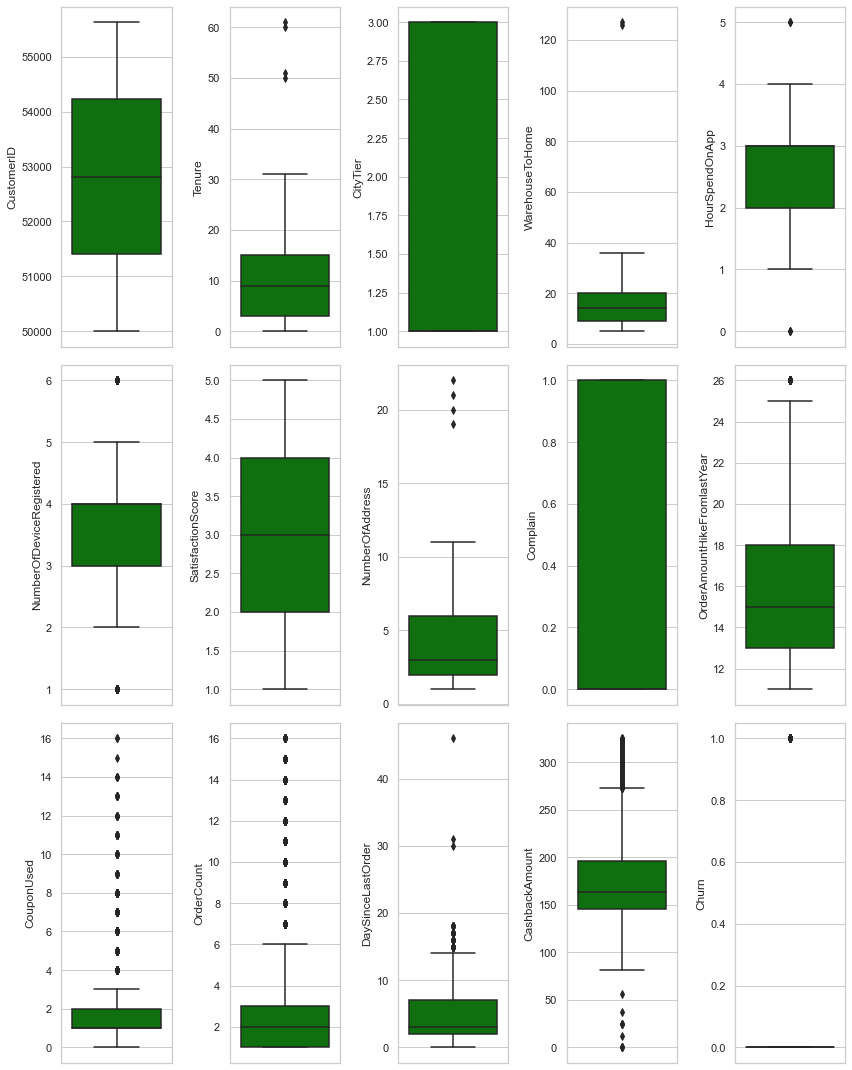

In [46]:
plt.figure(figsize=(12, 20))
for i in range(0, len(nums)):
    plt.subplot(4, int(len(nums)/3), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()
plt.show()

In [47]:
df.head(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     9.0         Mobile Phone         1              8.0   
2       50003      1     9.0         Mobile Phone         1             30.0   
3       50004      1     0.0         Mobile Phone         3             15.0   
4       50005      1     0.0         Mobile Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4          Credit Card    Male             3.0                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1        Mobile Phone                  3        Single                7   
2        Mobile Phone                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4        Mobile Phone                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [48]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
columns_exclude = nums[:-1]

for col in columns_exclude:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5350


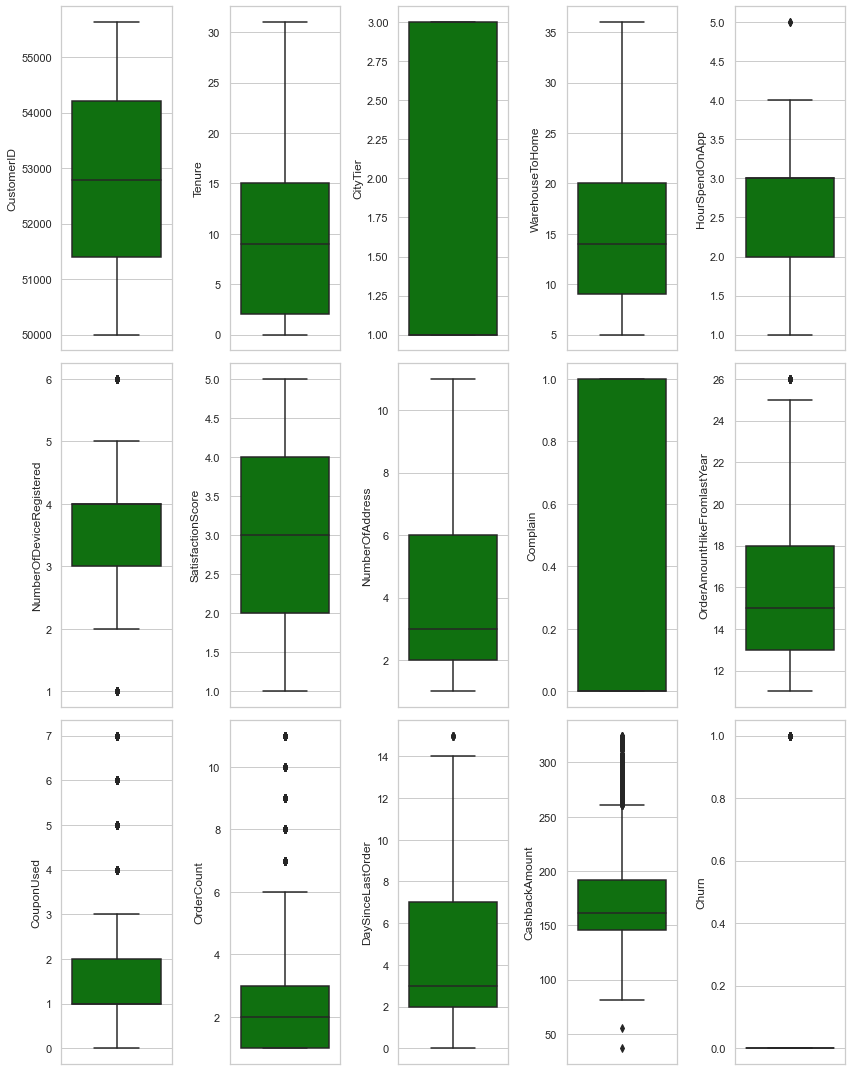

In [49]:
plt.figure(figsize=(12, 20))
for i in range(0, len(nums)):
    plt.subplot(4, int(len(nums)/3), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()
plt.show()

### D. Features Transformations

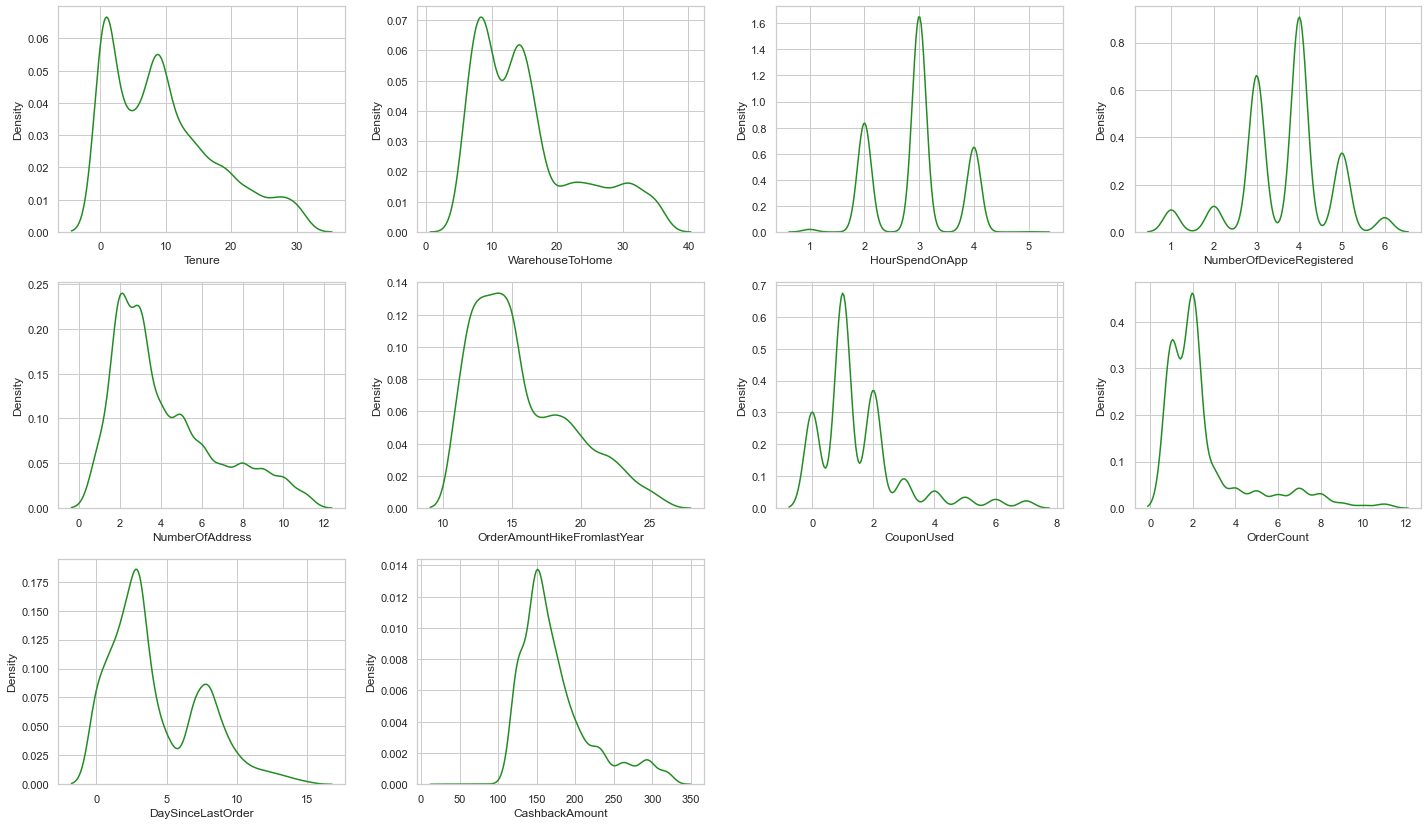

In [50]:
#Melihat behavior dari setiap fitur untuk menentukan jenis imputasi yang akan digunakan
features = kontinu_interval
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.kdeplot(x=df[features[i]], color='forestgreen')
  plt.xlabel(features[i])
  plt.tight_layout()

In [51]:
df.describe().T

count          mean          std      min  \
CustomerID                   5350.0  52802.826168  1627.280475  50001.0   
Churn                        5350.0      0.170467     0.376078      0.0   
Tenure                       5350.0      9.804112     8.178609      0.0   
CityTier                     5350.0      1.652710     0.913816      1.0   
WarehouseToHome              5350.0     15.541308     8.066006      5.0   
HourSpendOnApp               5350.0      2.929720     0.701942      1.0   
NumberOfDeviceRegistered     5350.0      3.675140     1.026057      1.0   
SatisfactionScore            5350.0      3.056449     1.378802      1.0   
NumberOfAddress              5350.0      4.196449     2.544520      1.0   
Complain                     5350.0      0.286355     0.452100      0.0   
OrderAmountHikeFromlastYear  5350.0     15.661869     3.574000     11.0   
CouponUsed                   5350.0      1.522243     1.411624      0.0   
OrderCount                   5350.0      2.558692     2.084810      1.0   
DaySinceLastOrder            5350.0      4.231963     3.270366      0.0   
CashbackAmount               5350.0    174.579836    46.530132     37.0   

                                  25%       50%       75%       max  
CustomerID                   51394.25  52784.50  54208.75  55630.00  
Churn                            0.00      0.00      0.00      1.00  
Tenure                           2.00      9.00     15.00     31.00  
CityTier                         1.00      1.00      3.00      3.00  
WarehouseToHome                  9.00     14.00     20.00     36.00  
HourSpendOnApp                   2.00      3.00      3.00      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.00      6.00  
SatisfactionScore                2.00      3.00      4.00      5.00  
NumberOfAddress                  2.00      3.00      6.00     11.00  
Complain                         0.00      0.00      1.00      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.00     26.00  
CouponUsed                       1.00      1.00      2.00      7.00  
OrderCount                       1.00      2.00      3.00     11.00  
DaySinceLastOrder                2.00      3.00      7.00     15.00  
CashbackAmount                 145.34    161.42    191.52    324.73

### Feature Transformations

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5350 non-null   int64  
 1   Churn                        5350 non-null   int64  
 2   Tenure                       5350 non-null   float64
 3   PreferredLoginDevice         5350 non-null   object 
 4   CityTier                     5350 non-null   int64  
 5   WarehouseToHome              5350 non-null   float64
 6   PreferredPaymentMode         5350 non-null   object 
 7   Gender                       5350 non-null   object 
 8   HourSpendOnApp               5350 non-null   float64
 9   NumberOfDeviceRegistered     5350 non-null   int64  
 10  PreferedOrderCat             5350 non-null   object 
 11  SatisfactionScore            5350 non-null   int64  
 12  MaritalStatus                5350 non-null   object 
 13  NumberOfAddress   

In [53]:
# Normalization using MaxminScaler
from sklearn.preprocessing import MinMaxScaler

df['norm_Tenure'] = MinMaxScaler().fit_transform(df['Tenure'].values.reshape(len(df), 1))
df['norm_WarehouseToHome'] = MinMaxScaler().fit_transform(df['WarehouseToHome'].values.reshape(len(df), 1))
df['norm_NumberOfAddress'] = MinMaxScaler().fit_transform(df['NumberOfAddress'].values.reshape(len(df), 1))
df['norm_OrderAmountHikeFromlastYear'] = MinMaxScaler().fit_transform(df['OrderAmountHikeFromlastYear'].values.reshape(len(df), 1))
df['norm_CouponUsed'] = MinMaxScaler().fit_transform(df['CouponUsed'].values.reshape(len(df), 1))
df['norm_OrderCount'] = MinMaxScaler().fit_transform(df['OrderCount'].values.reshape(len(df), 1))
df['norm_DaySinceLastOrder'] = MinMaxScaler().fit_transform(df['DaySinceLastOrder'].values.reshape(len(df), 1))
df['norm_CashbackAmount'] = MinMaxScaler().fit_transform(df['CashbackAmount'].values.reshape(len(df), 1))

In [54]:
df.describe().T

count          mean          std      min  \
CustomerID                        5350.0  52802.826168  1627.280475  50001.0   
Churn                             5350.0      0.170467     0.376078      0.0   
Tenure                            5350.0      9.804112     8.178609      0.0   
CityTier                          5350.0      1.652710     0.913816      1.0   
WarehouseToHome                   5350.0     15.541308     8.066006      5.0   
HourSpendOnApp                    5350.0      2.929720     0.701942      1.0   
NumberOfDeviceRegistered          5350.0      3.675140     1.026057      1.0   
SatisfactionScore                 5350.0      3.056449     1.378802      1.0   
NumberOfAddress                   5350.0      4.196449     2.544520      1.0   
Complain                          5350.0      0.286355     0.452100      0.0   
OrderAmountHikeFromlastYear       5350.0     15.661869     3.574000     11.0   
CouponUsed                        5350.0      1.522243     1.411624      0.0   
OrderCount                        5350.0      2.558692     2.084810      1.0   
DaySinceLastOrder                 5350.0      4.231963     3.270366      0.0   
CashbackAmount                    5350.0    174.579836    46.530132     37.0   
norm_Tenure                       5350.0      0.316262     0.263826      0.0   
norm_WarehouseToHome              5350.0      0.340042     0.260194      0.0   
norm_NumberOfAddress              5350.0      0.319645     0.254452      0.0   
norm_OrderAmountHikeFromlastYear  5350.0      0.310791     0.238267      0.0   
norm_CouponUsed                   5350.0      0.217463     0.201661      0.0   
norm_OrderCount                   5350.0      0.155869     0.208481      0.0   
norm_DaySinceLastOrder            5350.0      0.282131     0.218024      0.0   
norm_CashbackAmount               5350.0      0.478156     0.161715      0.0   

                                           25%           50%           75%  \
CustomerID                        51394.250000  52784.500000  54208.750000   
Churn                                 0.000000      0.000000      0.000000   
Tenure                                2.000000      9.000000     15.000000   
CityTier                              1.000000      1.000000      3.000000   
WarehouseToHome                       9.000000     14.000000     20.000000   
HourSpendOnApp                        2.000000      3.000000      3.000000   
NumberOfDeviceRegistered              3.000000      4.000000      4.000000   
SatisfactionScore                     2.000000      3.000000      4.000000   
NumberOfAddress                       2.000000      3.000000      6.000000   
Complain                              0.000000      0.000000      1.000000   
OrderAmountHikeFromlastYear          13.000000     15.000000     18.000000   
CouponUsed                            1.000000      1.000000      2.000000   
OrderCount                            1.000000      2.000000      3.000000   
DaySinceLastOrder                     2.000000      3.000000      7.000000   
CashbackAmount                      145.340000    161.420000    191.520000   
norm_Tenure                           0.064516      0.290323      0.483871   
norm_WarehouseToHome                  0.129032      0.290323      0.483871   
norm_NumberOfAddress                  0.100000      0.200000      0.500000   
norm_OrderAmountHikeFromlastYear      0.133333      0.266667      0.466667   
norm_CouponUsed                       0.142857      0.142857      0.285714   
norm_OrderCount                       0.000000      0.100000      0.200000   
norm_DaySinceLastOrder                0.133333      0.200000      0.466667   
norm_CashbackAmount                   0.376534      0.432419      0.537031   

                                       max  
CustomerID                        55630.00  
Churn                                 1.00  
Tenure                               31.00  
CityTier                              3.00  
WarehouseToHome 

### E. Feature Encoding

In [55]:
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     9.0         Mobile Phone         1              8.0   
2       50003      1     9.0         Mobile Phone         1             30.0   
3       50004      1     0.0         Mobile Phone         3             15.0   
4       50005      1     0.0         Mobile Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  ...  \
0           Debit Card  Female             3.0                         3  ...   
1                  UPI    Male             3.0                         4  ...   
2           Debit Card    Male             2.0                         4  ...   
3           Debit Card    Male             2.0                         4  ...   
4          Credit Card    Male             3.0                         3  ...   

  DaySinceLastOrder  CashbackAmount norm_Tenure  norm_WarehouseToHome  \
0               5.0          159.93    0.129032              0.032258   
1               0.0          120.90    0.290323              0.096774   
2               3.0          120.28    0.290323              0.806452   
3               3.0          134.07    0.000000              0.322581   
4               3.0          129.60    0.000000              0.225806   

   norm_NumberOfAddress  norm_OrderAmountHikeFromlastYear  norm_CouponUsed  \
0                   0.8                          0.000000         0.142857   
1                   0.6                          0.266667         0.000000   
2                   0.5                          0.200000         0.000000   
3                   0.7                          0.800000         0.000000   
4                   0.2                          0.000000         0.142857   

   norm_OrderCount  norm_DaySinceLastOrder  norm_CashbackAmount  
0              0.0                0.333333             0.427241  
1              0.0                0.000000             0.291593  
2              0.0                0.200000             0.289438  
3              0.0                0.200000             0.337365  
4              0.0                0.200000             0.321829  

[5 rows x 28 columns]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustomerID                        5350 non-null   int64  
 1   Churn                             5350 non-null   int64  
 2   Tenure                            5350 non-null   float64
 3   PreferredLoginDevice              5350 non-null   object 
 4   CityTier                          5350 non-null   int64  
 5   WarehouseToHome                   5350 non-null   float64
 6   PreferredPaymentMode              5350 non-null   object 
 7   Gender                            5350 non-null   object 
 8   HourSpendOnApp                    5350 non-null   float64
 9   NumberOfDeviceRegistered          5350 non-null   int64  
 10  PreferedOrderCat                  5350 non-null   object 
 11  SatisfactionScore                 5350 non-null   int64  
 12  Marita

In [57]:
#Buat List Kolom Dengan Tipe Data Object
columns_object = []

for i in df.columns:
    if df[i].dtype == 'object':
        kolom_object = i
        columns_object.append(kolom_object)

#cek isi kolom object
columns_object

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [58]:
#Lakukan Label Encoder dan One_Hot_Encoding
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder()
df['PreferredLoginDevice'] = label_encoder.fit_transform(df['PreferredLoginDevice'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus'], dtype=int)

In [59]:
df.head()

CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0                     1         3              6.0   
1       50002      1     9.0                     1         1              8.0   
2       50003      1     9.0                     1         1             30.0   
3       50004      1     0.0                     1         3             15.0   
4       50005      1     0.0                     1         1             12.0   

   Gender  HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  ...  \
0       0             3.0                         3                  2  ...   
1       1             3.0                         4                  3  ...   
2       1             2.0                         4                  3  ...   
3       1             2.0                         4                  5  ...   
4       1             3.0                         3                  5  ...   

   PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  \
0                              0                         0   
1                              0                         1   
2                              0                         0   
3                              0                         0   
4                              0                         0   

   PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                                    1                              0   
1                                    0                              1   
2                                    0                              1   
3                                    1                              0   
4                                    0                              1   

   PreferedOrderCat_Others  MaritalStatus_Divorced  MaritalStatus_Married  \
0                        0                       0                      0   
1                        0                       0                      0   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       0                      0   

   MaritalStatus_Single  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 38 columns]

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             5350 non-null   int64  
 1   Churn                                  5350 non-null   int64  
 2   Tenure                                 5350 non-null   float64
 3   PreferredLoginDevice                   5350 non-null   int64  
 4   CityTier                               5350 non-null   int64  
 5   WarehouseToHome                        5350 non-null   float64
 6   Gender                                 5350 non-null   int64  
 7   HourSpendOnApp                         5350 non-null   float64
 8   NumberOfDeviceRegistered               5350 non-null   int64  
 9   SatisfactionScore                      5350 non-null   int64  
 10  NumberOfAddress                        5350 non-null   int64  
 11  Comp

### F. Handle class imbalance

In [61]:
#Cek Jumlah Data Target (Y_train)
df_feature = df.drop(['Churn'], axis=1)
df_target = df['Churn']

target = df_target.value_counts().to_list()
sum_target = int(target[0] + target[1])
percentage_0 = (int(target[0]) / sum_target) * 100
percentage_1 = (int(target[1]) / sum_target) * 100

In [62]:
Y_target = pd.DataFrame({'Churn' : ['Yes', 'No'],
                              'Total' : [target[1], target[0]],
                              'Percentage' : [round(percentage_1, 1), round(percentage_0, 1)]
                              })
Y_target

Churn  Total  Percentage
0   Yes    912        17.0
1    No   4438        83.0

- Kita akan melakukan Handle class imbalance dengan teknik oversampling, ini dilakukan karena pada data target rasio antara customer churn dengan customer tidak churn adalal 1 : 4,7
- Dalam persentase total Churn Yes = 17.3% dan Churn No = 83%

In [63]:
#Lakukan Teknik Over_sampling dengan SMOTE untuk mengatasi class imbalance 
from imblearn import over_sampling

df_feature, df_target = over_sampling.SMOTE().fit_resample(df_feature, df_target)

In [64]:
#Cek Kembali Jumlah Data Target (Y_train) Setelah Dilakukan Oversampling
df_target_result = df_target.value_counts().to_list()
df_target_result_smote = pd.DataFrame({'Churn' : ['Yes', 'No'],
                                    'Total' : [df_target_result[0], df_target_result[1]]})
df_target_result_smote

Churn  Total
0   Yes   4438
1    No   4438

# Feature Engineering 

### A. Feature Selection

In [65]:
corr_matrix = df.corr()
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                                    1.000000
Complain                                 0.258223
PreferedOrderCat_Mobile Phone            0.216724
MaritalStatus_Single                     0.180288
NumberOfDeviceRegistered                 0.118346
SatisfactionScore                        0.111592
CityTier                                 0.090698
norm_WarehouseToHome                     0.077735
WarehouseToHome                          0.077735
PreferredPaymentMode_Cash on Delivery    0.066650
PreferredPaymentMode_E wallet            0.062879
NumberOfAddress                          0.040018
norm_NumberOfAddress                     0.040018
Gender                                   0.028538
HourSpendOnApp                           0.024854
PreferredPaymentMode_UPI                 0.006876
norm_OrderAmountHikeFromlastYear         0.000330
OrderAmountHikeFromlastYear              0.000330
CouponUsed                              -0.003974
norm_CouponUsed                         -0.003974


Text(0.5, 1.0, 'Relation Between Features and target')

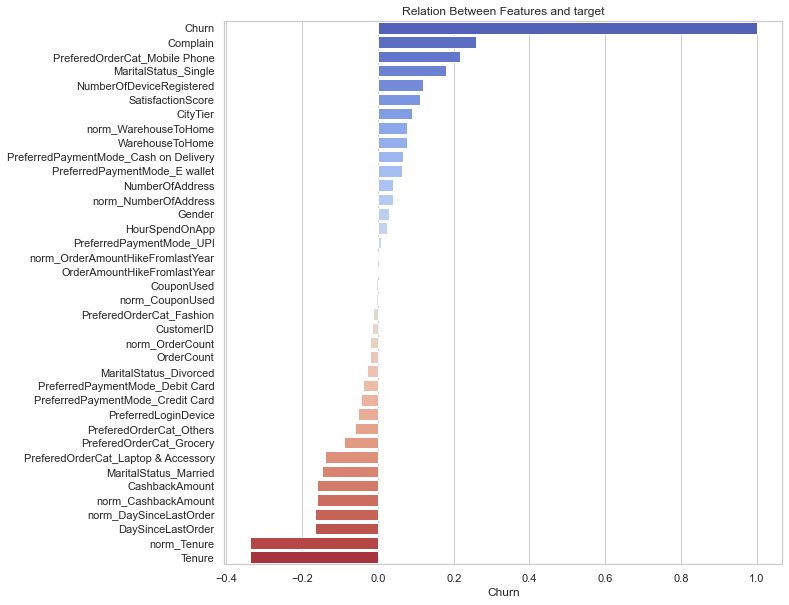

In [66]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')

Feature yang dilakukan adalah membuang beberapa kolom yang tidak dibutuhkan seperti : 
- CustomerID

In [67]:
df_feature.head()

CustomerID  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001     4.0                     1         3              6.0   
1       50002     9.0                     1         1              8.0   
2       50003     9.0                     1         1             30.0   
3       50004     0.0                     1         3             15.0   
4       50005     0.0                     1         1             12.0   

   Gender  HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0       0             3.0                         3                  2   
1       1             3.0                         4                  3   
2       1             2.0                         4                  3   
3       1             2.0                         4                  5   
4       1             3.0                         3                  5   

   NumberOfAddress  ...  PreferredPaymentMode_E wallet  \
0                9  ...                              0   
1                7  ...                              0   
2                6  ...                              0   
3                8  ...                              0   
4                3  ...                              0   

   PreferredPaymentMode_UPI  PreferedOrderCat_Fashion  \
0                         0                         0   
1                         1                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                         0                                    1   
1                         0                                    0   
2                         0                                    0   
3                         0                                    1   
4                         0                                    0   

   PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                              0                        0   
1                              1                        0   
2                              1                        0   
3                              0                        0   
4                              1                        0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  
0                       0                      0                     1  
1                       0                      0                     1  
2                       0                      0                     1  
3                       0                      0                     1  
4                       0                      0                     1  

[5 rows x 37 columns]

In [68]:
#Buang Feature Yang dianggap Tidak Penting (CustomerID)
df_feature = df_feature.drop(['CustomerID'], axis=1)

In [69]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8876 entries, 0 to 8875
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tenure                                 8876 non-null   float64
 1   PreferredLoginDevice                   8876 non-null   int64  
 2   CityTier                               8876 non-null   int64  
 3   WarehouseToHome                        8876 non-null   float64
 4   Gender                                 8876 non-null   int64  
 5   HourSpendOnApp                         8876 non-null   float64
 6   NumberOfDeviceRegistered               8876 non-null   int64  
 7   SatisfactionScore                      8876 non-null   int64  
 8   NumberOfAddress                        8876 non-null   int64  
 9   Complain                               8876 non-null   int64  
 10  OrderAmountHikeFromlastYear            8876 non-null   float64
 11  Coup

### B. Feature Extraction

Semua feature sudah tepat dan sudah cukup untuk dilakukan modeling, jadi tidak ada feature extraction

### C. Tambahan Feature

Terdapat beberapa feature tambahan yang dapat dilakukan atau ditambahkan dalam dataset ini berikut daftar tambahan feature : 
- **AverageOrderAmoun** <br>
Merupakan rata - rata jumlah pesanan pada setiap customer selama periode tertentu. 
- **ComplaintsPerOrder** <br>
Merupakan rasio complain customer terhadap jumlah order yang dilakukan
- **CouponUsageRate** <br>
Merupakan rasio penggunaan coupon terhadap jumlah order yang dilakukan
- **OrderFrequency** <br>
Merupakan perhitungan seberapa sering customer melakukan order.

# Modeling & Evaluation

## Modeling

In [70]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8876 entries, 0 to 8875
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tenure                                 8876 non-null   float64
 1   PreferredLoginDevice                   8876 non-null   int64  
 2   CityTier                               8876 non-null   int64  
 3   WarehouseToHome                        8876 non-null   float64
 4   Gender                                 8876 non-null   int64  
 5   HourSpendOnApp                         8876 non-null   float64
 6   NumberOfDeviceRegistered               8876 non-null   int64  
 7   SatisfactionScore                      8876 non-null   int64  
 8   NumberOfAddress                        8876 non-null   int64  
 9   Complain                               8876 non-null   int64  
 10  OrderAmountHikeFromlastYear            8876 non-null   float64
 11  Coup

In [ ]:
#memisahkan data tipe Kontinu(Interval)
kontinu_interval  = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [87]:
list_variable = kontinu_interval

for i in list_variable:
    new_var = "norm_" + i
    df[new_var] = MinMaxScaler().fit_transform(df[i].values.reshape(len(df), 1))

In [89]:
df_feature = df_feature.drop(kontinu_interval, axis=1)

In [90]:
df_feature.describe().T

count      mean       std  min  \
PreferredLoginDevice                   8876.0  0.604664  0.488950  0.0   
CityTier                               8876.0  1.616043  0.853128  1.0   
Gender                                 8876.0  0.520054  0.499626  0.0   
SatisfactionScore                      8876.0  3.046755  1.279331  1.0   
Complain                               8876.0  0.290221  0.453890  0.0   
norm_Tenure                            8876.0  0.232352  0.244931  0.0   
norm_WarehouseToHome                   8876.0  0.352767  0.245766  0.0   
norm_NumberOfAddress                   8876.0  0.326338  0.242767  0.0   
norm_OrderAmountHikeFromlastYear       8876.0  0.315173  0.230608  0.0   
norm_CouponUsed                        8876.0  0.214884  0.189497  0.0   
norm_OrderCount                        8876.0  0.149282  0.193113  0.0   
norm_DaySinceLastOrder                 8876.0  0.246173  0.199088  0.0   
norm_CashbackAmount                    8876.0  0.451423  0.145745  0.0   
PreferredPaymentMode_Cash on Delivery  8876.0  0.065683  0.247741  0.0   
PreferredPaymentMode_Credit Card       8876.0  0.219581  0.413986  0.0   
PreferredPaymentMode_Debit Card        8876.0  0.306332  0.460995  0.0   
PreferredPaymentMode_E wallet          8876.0  0.074132  0.262001  0.0   
PreferredPaymentMode_UPI               8876.0  0.046643  0.210884  0.0   
PreferedOrderCat_Fashion               8876.0  0.101848  0.302465  0.0   
PreferedOrderCat_Grocery               8876.0  0.037517  0.190035  0.0   
PreferedOrderCat_Laptop & Accessory    8876.0  0.260816  0.439104  0.0   
PreferedOrderCat_Mobile Phone          8876.0  0.444232  0.496908  0.0   
PreferedOrderCat_Others                8876.0  0.023997  0.153049  0.0   
MaritalStatus_Divorced                 8876.0  0.108720  0.311305  0.0   
MaritalStatus_Married                  8876.0  0.382154  0.485941  0.0   
MaritalStatus_Single                   8876.0  0.297206  0.457054  0.0   

                                            25%       50%       75%  max  
PreferredLoginDevice                   0.000000  1.000000  1.000000  1.0  
CityTier                               1.000000  1.000000  2.000000  3.0  
Gender                                 0.000000  1.000000  1.000000  1.0  
SatisfactionScore                      2.000000  3.000000  4.000000  5.0  
Complain                               0.000000  0.000000  1.000000  1.0  
norm_Tenure                            0.032258  0.161290  0.354839  1.0  
norm_WarehouseToHome                   0.161290  0.290323  0.483946  1.0  
norm_NumberOfAddress                   0.100000  0.237041  0.499714  1.0  
norm_OrderAmountHikeFromlastYear       0.133333  0.266667  0.466667  1.0  
norm_CouponUsed                        0.142857  0.142857  0.285714  1.0  
norm_OrderCount                        0.000000  0.100000  0.165272  1.0  
norm_DaySinceLastOrder                 0.096237  0.200000  0.361727  1.0  
norm_CashbackAmount                    0.358988  0.407014  0.503145  1.0  
PreferredPaymentMode_Cash on Delivery  0.000000  0.000000  0.000000  1.0  
PreferredPaymentMode_Credit Card       0.000000  0.000000  0.000000  1.0  
PreferredPaymentMode_Debit Card        0.000000  0.000000  1.000000  1.0  
PreferredPaymentMode_E wallet          0.000000  0.000000  0.000000  1.0  
PreferredPaymentMode_UPI               0.000000  0.000000  0.000000  1.0  
PreferedOrderCat_Fashion               0.000000  0.000000  0.000000  1.0  
PreferedOrderCat_Grocery               0.000000  0.000000  0.000000  1.0  
PreferedOrderCat_Laptop & Accessory    0.000000  0.000000  1.000000  1.0  
PreferedOrderCat_Mobile Phone          0.000000  0.000000  1.000000  1.0  
PreferedOrderCat_Others                0.000000  0.000000  0.000000  1.0  
MaritalStatus_Divorced                 0.000000  0.000000  0.000000  1.0  
MaritalStatus_Married                  0.000000  0.000000  1.000000  1.0  
MaritalStatus_Single                   0.000000  0.000000  1.000000  1.0

#### A. Split Data Train & Test

In [91]:
from sklearn.model_selection import train_test_split

X = df_feature
Y = df_target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [92]:
split_list = [X_train, X_test, Y_train, Y_test]

# Looping untuk mengecek ukuran variabel dan nama variabel
for var in split_list:
    # Mendapatkan nama variabel dengan menggunakan globals() atau locals()
    var_name = [name for name, value in locals().items() if value is var][0]

    # Menggunakan shape untuk mendapatkan ukuran variabel
    var_shape = var.shape

    print(f"Variable name: {var_name}, Shape: {var_shape}")

Variable name: X_train, Shape: (7100, 26)
Variable name: X_test, Shape: (1776, 26)
Variable name: Y_train, Shape: (7100,)
Variable name: Y_test, Shape: (1776,)


#### B.Modeling

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [94]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

/Users/fajararahman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

#### C. Model Evaluation

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model,random_state=42):
    Y_pred = model.predict(X_test)
    Y_pred_train = model.predict(X_train)
    Y_pred_proba = model.predict_proba(X_test)
    Y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(Y_test, Y_pred))
    print("Precision (Test Set): %.2f" % precision_score(Y_test, Y_pred))
    print("Recall (Train Set): %.2f" % recall_score(Y_train, Y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(Y_test, Y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(Y_test, Y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(Y_test, Y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(Y_train, Y_pred_proba_train[:, 1]))


### D. Model Evaluation: Apakah model sudah best-fit? Hindari Overfit/Underfit. Validasi dengan cross-validation

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Define your classification model as 'model' here

# Specify the number of folds for k-fold cross-validation
num_folds = 10

accuracy_list = []
precision_list = []
recall_list = []
f1score_list = []
roc_auc_list = []

# Create a function for k-fold cross-validation
def k_fold_cross_validation(model, num_folds=10, random_state=42):
    # Perform k-fold cross-validation and get scores for each fold
    scores = cross_val_score(model, X, Y, cv=num_folds)
    
    # Collect the accuracy scores for each fold
    accuracy_list.extend(scores)

    # You can calculate other metrics as well, similar to your existing code
    # For precision, recall, F1-score, and ROC AUC, you'll need to define a scoring function

    # Precision
    precision = cross_val_score(model, X, Y, cv=num_folds, scoring='precision')
    precision_list.extend(precision)

    # Recall
    recall = cross_val_score(model, X, Y, cv=num_folds, scoring='recall')
    recall_list.extend(recall)

    # F1-score
    f1 = cross_val_score(model, X, Y, cv=num_folds, scoring='f1')
    f1score_list.extend(f1)

    # ROC AUC
    roc_auc = cross_val_score(model, X, Y, cv=num_folds, scoring='roc_auc')
    roc_auc_list.extend(roc_auc)

    # Print the metrics for each fold
    for fold, score in enumerate(scores, 1):
        print(f"Fold {fold}:")
        print(f"Accuracy: {score:.2f}")
        print(f"Precision: {precision[fold - 1]:.2f}")
        print(f"Recall: {recall[fold - 1]:.2f}")
        print(f"F1-Score: {f1[fold - 1]:.2f}")
        print(f"ROC AUC: {roc_auc[fold - 1]:.2f}")
        print()  # Add an empty line between folds

# Call the k-fold cross-validation function
k_fold_cross_validation(model, num_folds)

# You can access the collected metrics in accuracy_list, precision_list, recall_list, f1score_list, and roc_auc_lis

Fold 1:
Accuracy: 0.98
Precision: 0.97
Recall: 0.92
F1-Score: 0.94
ROC AUC: 1.00

Fold 2:
Accuracy: 0.97
Precision: 1.00
Recall: 0.89
F1-Score: 0.94
ROC AUC: 1.00

Fold 3:
Accuracy: 0.95
Precision: 0.88
Recall: 0.87
F1-Score: 0.87
ROC AUC: 0.99

Fold 4:
Accuracy: 0.97
Precision: 0.98
Recall: 0.92
F1-Score: 0.94
ROC AUC: 1.00

Fold 5:
Accuracy: 0.98
Precision: 0.97
Recall: 0.89
F1-Score: 0.92
ROC AUC: 0.99

Fold 6:
Accuracy: 0.98
Precision: 0.96
Recall: 0.92
F1-Score: 0.94
ROC AUC: 1.00

Fold 7:
Accuracy: 0.99
Precision: 0.98
Recall: 0.90
F1-Score: 0.94
ROC AUC: 1.00

Fold 8:
Accuracy: 0.96
Precision: 0.85
Recall: 0.91
F1-Score: 0.87
ROC AUC: 0.99

Fold 9:
Accuracy: 0.97
Precision: 0.95
Recall: 0.96
F1-Score: 0.92
ROC AUC: 0.99

Fold 10:
Accuracy: 0.98
Precision: 1.00
Recall: 0.90
F1-Score: 0.94
ROC AUC: 1.00



Loop list dengan np.std

In [107]:
np.std(accuracy_list)

0.01109121771898825

In [109]:
metric_lists = [accuracy_list, precision_list, recall_list, f1score_list, roc_auc_list]
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"]

for metric_name, metric_list in zip(metric_names, metric_lists):
    metric_std = np.std(metric_list)
    print(f"{metric_name} Std Dev: {metric_std}")

Accuracy Std Dev: 0.01109121771898825
Precision Std Dev: 0.04690005098171019
Recall Std Dev: 0.023035664419814552
F1-Score Std Dev: 0.027190119319175317
ROC AUC Std Dev: 0.0042981635677585535


Standar Deviasi Akurasi: 0.0111

Standar deviasi untuk akurasi adalah 0.0111, yang berarti skor akurasi untuk setiap lipatan dalam validasi silang k-fold Anda relatif mendekati rata-rata akurasi. Standar deviasi rendah menunjukkan bahwa skor akurasi konsisten dan memiliki sedikit variasi antara lipatan yang berbeda.
Standar Deviasi Presisi: 0.0469

Standar deviasi untuk presisi adalah 0.0469, yang mengindikasikan bahwa skor presisi bervariasi lebih banyak dibandingkan dengan akurasi. Standar deviasi yang lebih tinggi berarti ada lebih banyak variasi dalam presisi di antara lipatan yang berbeda.
Standar Deviasi Recall: 0.0230

Standar deviasi untuk recall adalah 0.0230, yang menunjukkan bahwa skor recall lebih konsisten daripada presisi tetapi memiliki beberapa variasi. Ini kurang bervariasi dibandingkan dengan presisi tetapi masih menunjukkan variasi yang cukup.
Standar Deviasi F1-Score: 0.0272

Standar deviasi untuk F1-score adalah 0.0272, yang mengindikasikan bahwa skor F1 juga memiliki variasi moderat di antara lipatan yang berbeda. Metrik ini menggabungkan baik presisi dan recall, sehingga berada di antara standar deviasi dari kedua metrik tersebut.
Standar Deviasi ROC AUC: 0.0043

Standar deviasi untuk ROC AUC sangat rendah pada 0.0043. Ini berarti skor ROC AUC sangat konsisten dan memiliki sedikit variasi di antara lipatan yang berbeda, menunjukkan stabilitas yang tinggi dalam kinerja model untuk metrik ini.
Secara ringkas, standar deviasi yang lebih rendah (misalnya, untuk ROC AUC) menunjukkan bahwa nilai metrik lebih konsisten dan memiliki variasi yang lebih sedikit antara lipatan, sementara standar deviasi yang lebih tinggi (misalnya, untuk presisi) menunjukkan variasi yang lebih besar dalam nilai metrik di antara lipatan yang berbeda. Standar deviasi memberikan wawasan tentang stabilitas dan konsistensi kinerja model Anda di berbagai lipatan dalam validasi silang Anda.

### E. Hyperparameter Tuning

In [111]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid for random search
param_grid = {
    'n_estimators': randint(100, 1000),  # Number of boosting rounds
    'max_depth': randint(3, 10),  # Maximum depth of the trees
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'subsample': uniform(0.6, 0.4),  # Fraction of samples used for each boosting round
    'colsample_bytree': uniform(0.6, 0.4),  # Fraction of features used for each boosting round
    'gamma': uniform(0, 1),  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': uniform(0, 1),  # L1 regularization term on weights
    'reg_lambda': uniform(0, 1),  # L2 regularization term on weights
}

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=100,  # Adjust the number of iterations as needed
    cv=10,  # Number of cross-validation folds
    scoring='roc_auc',  # Use an appropriate scoring metric
    random_state=42,
    n_jobs=-1  # Use multiple CPU cores for faster search
)

# Fit the RandomizedSearchCV to your data
random_search.fit(X, Y)  # Replace X and Y with your data

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train, Y_train)  # Replace X and Y with your data

Best Hyperparameters: {'colsample_bytree': 0.9074216057225236, 'gamma': 0.04360377175443375, 'learning_rate': 0.3083651532392023, 'max_depth': 8, 'n_estimators': 576, 'reg_alpha': 0.2795603417967586, 'reg_lambda': 0.883494022266259, 'subsample': 0.8990875095589655}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9074216057225236, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.04360377175443375,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3083651532392023,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=576, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [113]:
best_xgb_model.predict(X_test)

array([1, 1, 1, ..., 0, 0, 1])

In [115]:
accuracy_list = []
precision_list = []
recall_list = []
f1score_list = []
roc_auc_list = []

In [116]:
k_fold_cross_validation(best_xgb_model, num_folds)

Fold 1:
Accuracy: 0.99
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
ROC AUC: 1.00

Fold 2:
Accuracy: 0.99
Precision: 0.99
Recall: 0.95
F1-Score: 0.97
ROC AUC: 1.00

Fold 3:
Accuracy: 0.96
Precision: 0.83
Recall: 0.95
F1-Score: 0.88
ROC AUC: 0.99

Fold 4:
Accuracy: 0.98
Precision: 0.96
Recall: 0.93
F1-Score: 0.94
ROC AUC: 1.00

Fold 5:
Accuracy: 0.99
Precision: 0.98
Recall: 0.96
F1-Score: 0.97
ROC AUC: 0.99

Fold 6:
Accuracy: 0.98
Precision: 0.95
Recall: 0.95
F1-Score: 0.95
ROC AUC: 1.00

Fold 7:
Accuracy: 0.99
Precision: 1.00
Recall: 0.96
F1-Score: 0.98
ROC AUC: 1.00

Fold 8:
Accuracy: 0.97
Precision: 0.86
Recall: 0.96
F1-Score: 0.91
ROC AUC: 0.99

Fold 9:
Accuracy: 0.99
Precision: 0.98
Recall: 0.96
F1-Score: 0.97
ROC AUC: 0.99

Fold 10:
Accuracy: 0.99
Precision: 0.99
Recall: 0.96
F1-Score: 0.97
ROC AUC: 1.00



In [117]:
metric_lists = [accuracy_list, precision_list, recall_list, f1score_list, roc_auc_list]
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"]

for metric_name, metric_list in zip(metric_names, metric_lists):
    metric_std = np.std(metric_list)
    print(f"{metric_name} Std Dev: {metric_std}")

Accuracy Std Dev: 0.011127383974682012
Precision Std Dev: 0.05508165340442404
Recall Std Dev: 0.008811342210628025
F1-Score Std Dev: 0.029940327081213892
ROC AUC Std Dev: 0.004297521835428207


### Feature Importance

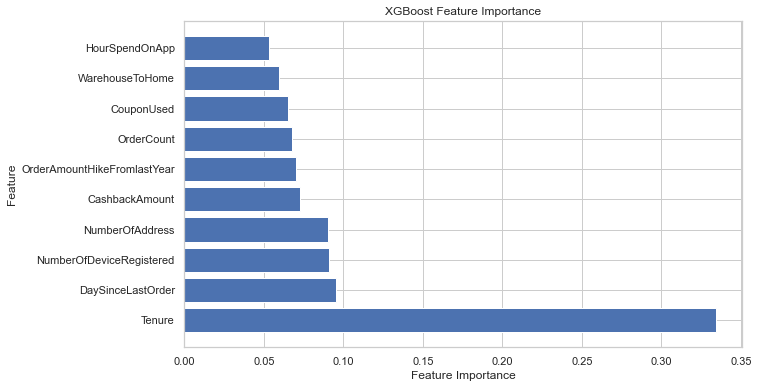

In [118]:
# Get feature importances
feature_importances = best_xgb_model.feature_importances_

# Get the names of the features (replace with your feature names if needed)
feature_names = list(X.columns)  # Replace X with your feature data

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()

In [119]:
print(importance_df['Feature'], importance_df['Importance'])

0                         Tenure
8              DaySinceLastOrder
3       NumberOfDeviceRegistered
4                NumberOfAddress
9                 CashbackAmount
5    OrderAmountHikeFromlastYear
7                     OrderCount
6                     CouponUsed
1                WarehouseToHome
2                 HourSpendOnApp
Name: Feature, dtype: object 0    0.334119
8    0.095345
3    0.090963
4    0.090645
9    0.072772
5    0.069934
7    0.067549
6    0.065460
1    0.059832
2    0.053383
Name: Importance, dtype: float32


Tenure (0.3341): Masa kerja pelanggan (lama waktu mereka menjadi pelanggan) memiliki pengaruh paling signifikan dalam model. Pelanggan yang telah berlangganan dalam jangka waktu yang lama cenderung cenderung tetap bersama perusahaan atau layanan. Ini adalah faktor yang kuat dalam memprediksi perilaku churn.

DaySinceLastOrder (0.0953): Lamanya waktu sejak pesanan terakhir pelanggan merupakan faktor penting dalam prediksi churn. Pelanggan yang tidak melakukan pesanan dalam waktu yang lama mungkin memiliki tingkat churn yang lebih tinggi.

NumberOfDeviceRegistered (0.0910): Jumlah perangkat yang didaftarkan oleh pelanggan juga memengaruhi prediksi churn. Pelanggan yang telah mendaftarkan banyak perangkat mungkin memiliki keterikatan yang kuat dengan layanan tersebut.

NumberOfAddress (0.0906): Jumlah alamat yang terkait dengan pelanggan adalah faktor yang signifikan dalam prediksi churn. Pelanggan dengan beberapa alamat mungkin menunjukkan tingkat keterikatan yang tinggi.

CashbackAmount (0.0728): Besarnya cashback yang diterima oleh pelanggan juga mempengaruhi prediksi churn. Cashback dapat menjadi faktor penting yang memengaruhi keputusan pelanggan untuk tetap menggunakan layanan.

OrderAmountHikeFromlastYear (0.0700): Persentase peningkatan jumlah pesanan dari tahun sebelumnya adalah faktor yang signifikan dalam prediksi churn. Penurunan pesanan dari tahun sebelumnya dapat mengindikasikan potensi churn.

OrderCount (0.0675): Jumlah pesanan yang ditempatkan oleh pelanggan memainkan peran dalam prediksi churn. Pelanggan yang sering melakukan pesanan mungkin cenderung tetap bersama layanan.

CouponUsed (0.0655): Penggunaan kupon oleh pelanggan memengaruhi prediksi churn. Penggunaan kupon dapat mempengaruhi keputusan pelanggan untuk tetap bersama perusahaan.

WarehouseToHome (0.0598): Waktu pengiriman pesanan dari gudang ke rumah pelanggan memainkan peran dalam prediksi churn. Pengiriman yang lambat atau tidak efisien dapat menjadi faktor dalam keputusan pelanggan untuk meninggalkan layanan.

HourSpendOnApp (0.0534): Jumlah jam yang dihabiskan pelanggan di aplikasi memiliki dampak yang lebih rendah dalam prediksi churn, namun tetap relevan. Pelanggan yang lebih aktif di aplikasi mungkin memiliki keterikatan yang lebih kuat.

In [97]:
eval_classification(xg)

Accuracy (Test Set): 0.98
Precision (Test Set): 0.98
Recall (Train Set): 1.00
Recall (Test Set): 0.98
F1-Score (Test Set): 0.98
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00


In [98]:
eval_classification(lr)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.94
Recall (Train Set): 0.89
Recall (Test Set): 0.88
F1-Score (Test Set): 0.91
roc_auc (test-proba): 0.97
roc_auc (train-proba): 0.97


Untuk menghindari nilai false positive churn, Kami memutuskan untuk memilih model dengan nilai gap roc-auc paling kecil dan memiliki nilai precision yang besar. Dari beberapa hasil uji model, **`XGBClassifier`** menjadi model algoritma yang paling cocok.

#### D. Model Evaluation Apakah model sudah best-fit? Hindari Overfit/Underfit. Validasi dengan cross-validation

In [99]:
from sklearn.model_selection import KFold # import KFold

import pandas as pd

dataset = df.copy()
X = df[features]
Y = df['Churn']
kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X)

5

In [100]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

TRAIN: [   0    1    2 ... 5347 5348 5349] TEST: [   8   12   15 ... 5342 5344 5345]
TRAIN: [   0    1    2 ... 5346 5347 5348] TEST: [  14   19   24 ... 5309 5328 5349]
TRAIN: [   1    2    3 ... 5345 5346 5349] TEST: [   0    6    7 ... 5321 5347 5348]
TRAIN: [   0    3    4 ... 5347 5348 5349] TEST: [   1    2   10 ... 5338 5343 5346]
TRAIN: [   0    1    2 ... 5347 5348 5349] TEST: [   3    4    5 ... 5334 5339 5341]


### Cross Validation in Validation Set 

In [101]:
from sklearn.model_selection import cross_val_score
model = XGBClassifier()
result = cross_val_score(model, X, Y, cv=kf, scoring='roc_auc')
result.mean()

0.9627537713494432

### Cross Validation in Train Set & Validation Set

In [102]:
from sklearn.model_selection import cross_validate
model = RandomForestClassifier()
score = cross_validate(model, X, Y, cv=kf, scoring='roc_auc', return_train_score=True)
print('roc_auc (train): '+ str(score['train_score'].mean()))
print('roc_auc (test): '+ str(score['test_score'].mean()))

roc_auc (train): 1.0
roc_auc (test): 0.9721611756944526


#### E. Hyperparameter Tuning

# Feature Importance

#### Evaluasi feature yang paling penting

#### Tarik businees insight-nya

#### Berikan action items berupa rekomendasi terhadap insight tersebut